In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
!pip install kaggle

In [0]:
pwd

'/content'

In [0]:
mkdir .kaggle

In [0]:
#importing json file
import json
token = {"username":"","key":""}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
ls -la

total 20
drwxr-xr-x 1 root root 4096 Mar 17 07:21 ./
drwxr-xr-x 1 root root 4096 Mar 17 07:19 ../
drwxr-xr-x 1 root root 4096 Mar  8 17:25 .config/
drwxr-xr-x 2 root root 4096 Mar 17 07:21 .kaggle/
drwxr-xr-x 1 root root 4096 Mar  8 17:26 sample_data/


In [0]:
cd /root

/root


In [0]:
ls -la

total 68
drwx------ 1 root root 4096 Mar 17 07:20 ./
drwxr-xr-x 1 root root 4096 Mar 17 07:19 ../
-rw-r--r-- 1 root root 3106 Apr  9  2018 .bashrc
drwx------ 1 root root 4096 Mar 14 16:13 .cache/
drwx------ 4 root root 4096 Mar 14 16:11 .config/
drwxr-xr-x 4 root root 4096 Mar 17 07:19 .forever/
drwxr-xr-x 3 root root 4096 Mar 13 16:05 .gsutil/
drwxr-xr-x 1 root root 4096 Mar 14 16:10 .ipython/
drwx------ 2 root root 4096 Mar 14 16:10 .jupyter/
drwxr-xr-x 2 root root 4096 Mar 17 07:20 .keras/
drwx------ 1 root root 4096 Mar 14 16:10 .local/
drwxr-xr-x 3 root root 4096 Mar 14 16:11 .node-gyp/
drwxr-xr-x 4 root root 4096 Mar 14 16:10 .npm/
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile


In [0]:
!mkdir .kaggle

In [0]:
cd /root/.kaggle

/root/.kaggle


In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [0]:
ls -la

total 16
drwxr-xr-x 2 root root 4096 Mar 17 07:21 ./
drwx------ 1 root root 4096 Mar 17 07:21 ../
-rw-r--r-- 1 root root   70 Mar 17 07:21 kaggle.json


In [0]:
cd /content

/content


In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c state-farm-distracted-driver-detection -p /content/drivers

  0% 0.00/193k [00:00<?, ?B/s]
100% 193k/193k [00:00<00:00, 38.9MB/s]
100% 3.99G/4.00G [01:10<00:00, 36.9MB/s]
100% 4.00G/4.00G [01:10<00:00, 60.9MB/s]
  0% 0.00/92.9k [00:00<?, ?B/s]
100% 92.9k/92.9k [00:00<00:00, 95.5MB/s]


In [0]:
cd drivers


/content/drivers


In [0]:
!unzip '/content/drivers/driver_imgs_list.csv.zip'

Archive:  /content/drivers/driver_imgs_list.csv.zip
  inflating: driver_imgs_list.csv    


In [0]:
!unzip '/content/drivers/imgs.zip'

Output hidden; open in https://colab.research.google.com to view.

In [0]:
!unzip '/content/drivers/sample_submission.csv.zip'

Archive:  /content/drivers/sample_submission.csv.zip
  inflating: sample_submission.csv   


In [0]:
path='/content/drivers/train'

In [0]:
# create a data bunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=32, valid_pct=0.2).normalize(imagenet_stats)

In [0]:
len(data.train_ds), len(data.valid_ds)

(17940, 4484)

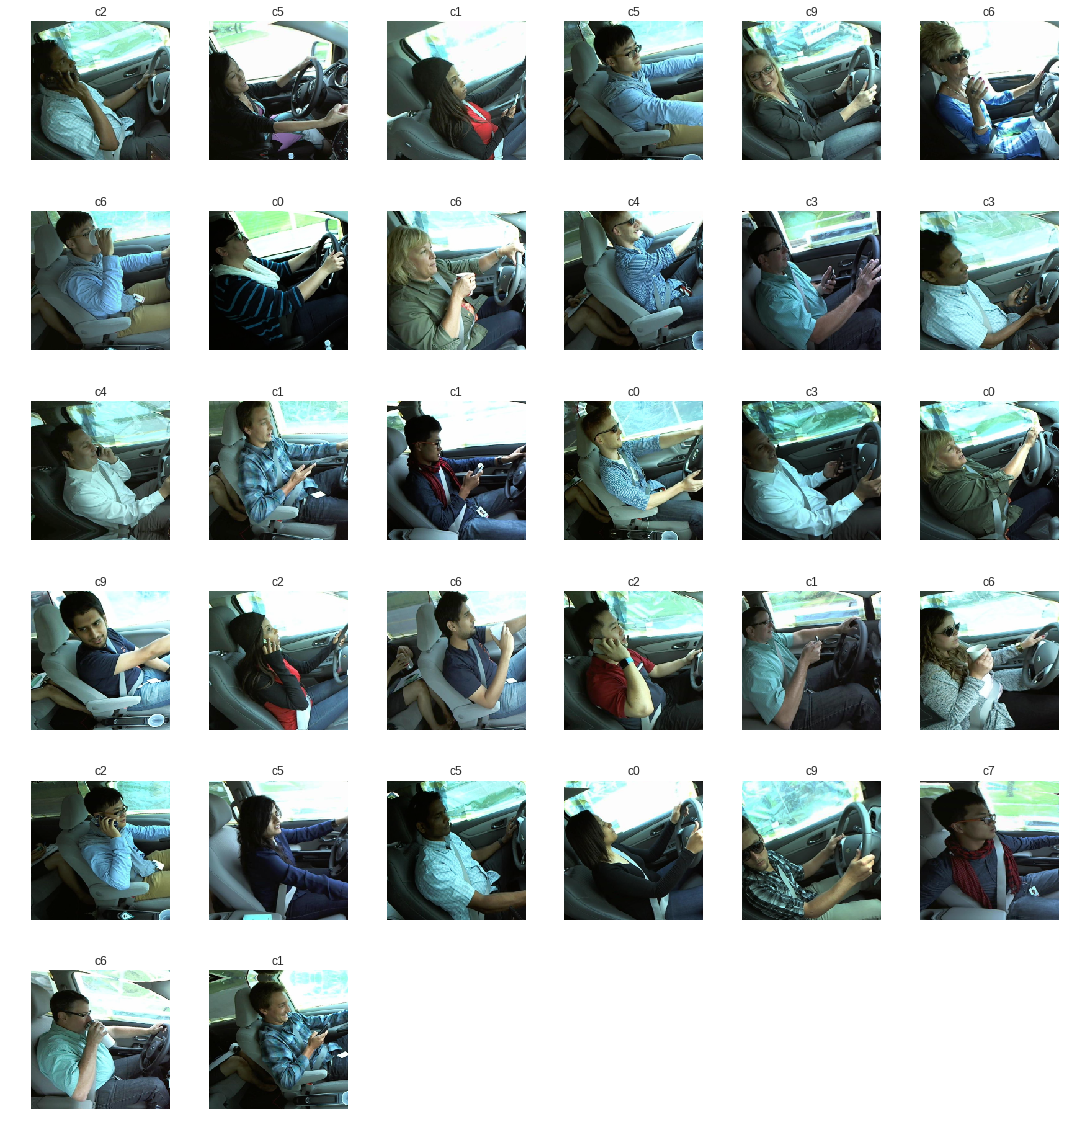

In [0]:
# display 6 rows of data
data.show_batch(rows=6, figsize=(15,16))

In [0]:
# verify the classes
print(data.classes)
len(data.classes),data.c

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


(10, 10)

**Looking at the data
Classes:

c0: safe driving
c1: texting - right
c2: talking on the phone - right
c3: texting - left
c4: talking on the phone - left
c5: operating the radio
c6: drinking
c7: reaching behind
c8: hair and makeup
c9: talking to passenger**




In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:02, 37824904.72it/s]


In [0]:
# fit 6 layers
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.371537,0.174380,0.052855,17:11
1,0.148884,0.064623,0.017841,16:40
2,0.112636,0.047285,0.014273,16:45


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


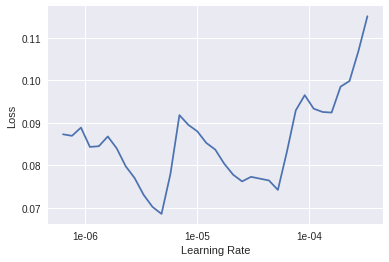

In [0]:
learn.recorder.plot()

In [0]:
# Take a look to layers...
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (8): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (10): ReLU(inplace)
   (11): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (13): Conv2d(256, 64, kernel_

In [0]:
learn.fit_one_cycle(3, max_lr=slice(2.0E-06,3.5E-06))

epoch,train_loss,valid_loss,error_rate,time
0,0.102989,0.040740,0.010482,18:30
1,0.082432,0.033905,0.009590,18:32
2,0.056610,0.032358,0.008252,18:49


In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
learn.save('/content/drive/My Drive/Fast1ai/Distracted driver fastaiv3/stage-2')

In [0]:
learn.load('/content/drive/My Drive/Fast1ai/Distracted driver fastaiv3/stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

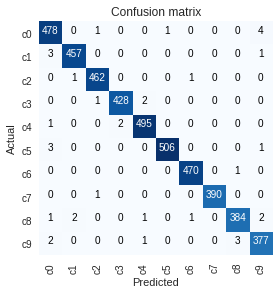

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.callbacks.hooks import *
def plot_top_losses_heatmap(k,learner, largest= True,figsize=(15,11)):
    tl_val,tl_idx = interp.top_losses(k,largest)
    print (tl_idx)
    classes = interp.data.classes
    rows = math.ceil(math.sqrt(k))
    fig,axes = plt.subplots(rows,rows,figsize=figsize)
    fig.suptitle('prediction/actual/loss/probability', weight='bold', size=14)
    for i,idx in enumerate(tl_idx):
        im,cl = interp.data.valid_ds[idx]
        cl = int(cl)
        ###
        xb,_ = data.one_item(im)
        xb = xb.cuda()
        m = learner.model.eval()
        with hook_output(m[0]) as hook_a:
            with hook_output(m[0], grad= True) as hook_g:
                preds = m(xb)
                preds[0,cl].backward()
        acts = hook_a.stored[0].cpu()
        avg_acts =acts.mean(0)
        sz = im.shape[-1]
        im.show(ax=axes.flat[i], title=
            f'{classes[interp.pred_class[idx]]}/{classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
        axes.flat[i].imshow(avg_acts, alpha =0.6, extent= (0,sz,sz,0), interpolation='bilinear', cmap='magma')

tensor([3329, 2852, 3895, 3327, 2310, 1754, 2551, 2066, 1514])


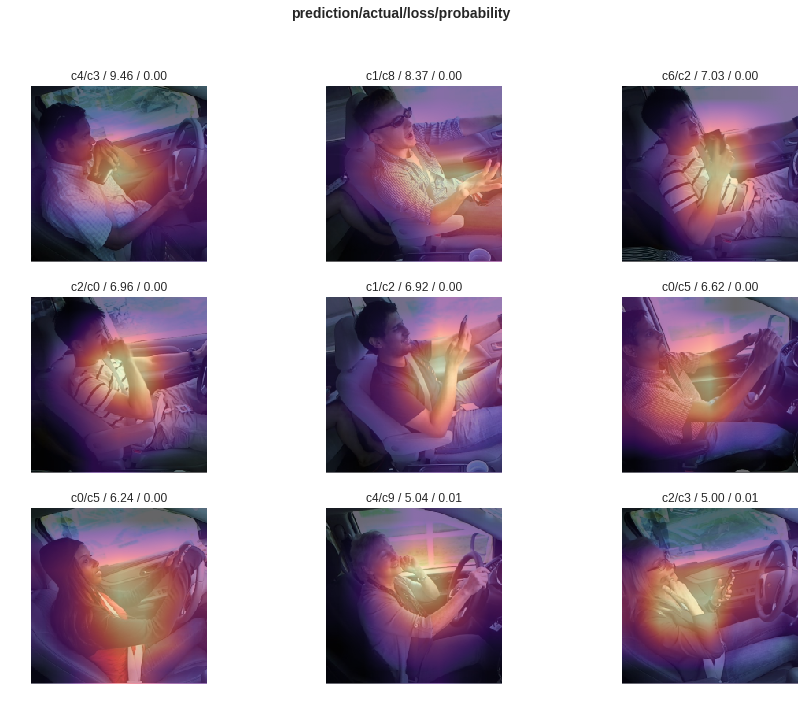

In [0]:
plot_top_losses_heatmap(9,learn,True)

In [0]:
#prediction 
learn.export()

In [0]:
img = open_image('')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class